# GPT-2 - Modelos de linguagem são aprendizes multitarefa não supervisionados

## Papel

Este caderno foi traduzido automaticamente para torná-lo acessível a mais pessoas, por favor me avise se você vir algum erro de digitação..

[Language Models are Unsupervised Multitask Learners] (https://d4mucfpksywv.cloudfront.net/better-language-models/language-models.pdf) é o documento GPT-2. Essa é a segunda versão do modelo [GPT-1] (https://maximofn.com/gpt1/) que já vimos.

## Arquitetura

Antes de falarmos sobre a arquitetura da GPT-2, vamos nos lembrar de como era a arquitetura da GPT-1.

![arquitetura gpt1](https://maximofn.com/wp-content/uploads/2024/06/GPT1_architecture.webp)

Uma arquitetura baseada em transformador é usada no GPT-2, como no [GPT-1] (https://maximofn.com/gpt1/), com os seguintes tamanhos

|Parameters|Layers|d_model|
|---|---|---|
|117M| 12| 768|
| 345M| 24| 1024|
| 762M| 36| 1280|
| 1542M| 48| 1600|

O modelo menor é equivalente ao GPT original, e o segundo modelo menor é equivalente ao modelo BERT maior. O modelo maior tem mais de uma ordem de magnitude de parâmetros a mais do que o GPT.

Além disso, foram feitas as seguintes modificações arquitetônicas

 * Uma camada de normalização é adicionada antes do bloco de atenção. Isso pode ajudar a estabilizar o treinamento do modelo e melhorar a capacidade do modelo de aprender representações mais profundas. Ao normalizar as entradas para cada bloco, a variabilidade nas saídas é reduzida e o treinamento do modelo é facilitado.
 * Uma normalização adicional foi adicionada após o bloco de autoatenção final. Isso pode ajudar a reduzir a variabilidade nos resultados do modelo e melhorar a estabilidade do modelo.
 * Na maioria dos modelos, os pesos das camadas são inicializados aleatoriamente, seguindo uma distribuição normal ou uniforme. No entanto, no caso do GPT-2, os autores decidiram usar uma inicialização modificada que leva em conta a profundidade do modelo. A ideia por trás dessa inicialização modificada é que, à medida que o modelo se torna mais profundo, o sinal que flui pelas camadas residuais fica mais fraco. Isso ocorre porque cada camada residual é adicionada à entrada original, o que pode fazer com que o sinal seja atenuado com a profundidade do modelo. Para neutralizar esse efeito, eles decidiram dimensionar os pesos da camada residual na inicialização por um fator de 1/√N, em que N é o número de camadas residuais. Isso significa que, à medida que o modelo se torna mais profundo, os pesos das camadas residuais ficam menores. Esse truque de inicialização pode ajudar a estabilizar o treinamento do modelo e melhorar sua capacidade de aprender representações mais profundas. Ao dimensionar os pesos da camada residual, a variabilidade nas saídas de cada camada é reduzida e o fluxo de sinal pelo modelo é facilitado. Em resumo, a inicialização modificada na GPT-2 é usada para neutralizar o efeito de atenuação do sinal nas camadas residuais, o que ajuda a estabilizar o treinamento do modelo e a melhorar sua capacidade de aprender representações mais profundas.
 * O tamanho do vocabulário foi ampliado para 50.257. Isso significa que o modelo pode aprender a representar um conjunto maior de palavras e tokens.
 * O tamanho do contexto foi aumentado de 512 para 1024 tokens. Isso permite que o modelo leve em conta um contexto maior ao gerar o texto.

Arquitetura GPT1 vs. GPT-2](https://maximofn.com/wp-content/uploads/2024/06/GPT1_vs_GPT2_architecture.webp)

## Resumo do artigo

As ideias mais interessantes do artigo são:

 * Para o pré-treinamento do modelo, eles pensaram em usar uma fonte de texto diversificada e quase ilimitada, a raspagem da Web como Common Crawl. No entanto, eles descobriram que o texto era de qualidade quase muito ruim. Por isso, usaram o conjunto de dados WebText, que também era proveniente de raspagem da Web, mas com um filtro de qualidade, como a quantidade de links de saída do reddit etc. Eles também removeram o texto proveniente da Wikipédia, pois ele poderia ser repetido em outras páginas.
 * Eles usaram um tokenizador BPE, que explicamos em uma [postagem] anterior (https://maximofn.com/bpe/).

## Geração de texto

Vamos ver como gerar texto com um GPT-2 pré-treinado.

Para gerar o texto, usaremos o modelo do repositório [GPT-2] (https://huggingface.co/openai-community/gpt2) do Hugging Face.

### Geração de texto com pipeline

Com esse modelo, agora podemos usar o pipeline de transformadores.

In [3]:
from transformers import pipeline

checkpoints = "openai-community/gpt2-xl"
generator = pipeline('text-generation', model=checkpoints)
output = generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)
for i, o in enumerate(output):
    print(f"Output {i+1}: {o['generated_text']}")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Output 1: Hello, I'm a language model, and I want to change the way you read

A little in today's post I want to talk about
Output 2: Hello, I'm a language model, with two roles: the language model and the lexicographer-semantics expert. The language models are going
Output 3: Hello, I'm a language model, and this is your brain. Here is your brain, and all this data that's stored in there, that
Output 4: Hello, I'm a language model, and I like to talk... I want to help you talk to your customers

Are you using language model
Output 5: Hello, I'm a language model, I'm gonna tell you about what type of language you're using. We all know a language like this,


### Geração de texto com modelo automático

Mas se quisermos usar o `Automodel`, podemos fazer o seguinte

In [2]:
import torch
from transformers import GPT2Tokenizer, AutoTokenizer

checkpoints = "openai-community/gpt2-xl"
tokenizer = GPT2Tokenizer.from_pretrained(checkpoints)
auto_tokenizer = AutoTokenizer.from_pretrained(checkpoints)

Assim como no [GPT-1](https://maximofn.com/gpt1/#Generaci%C3%B3n-de-texto), podemos importar o `GPT2Tokenizer` e o `AutoTokenizer`. Isso ocorre porque no [model card](https://huggingface.co/openai-community/gpt2) do GPT-2 diz para usar o `GPT2Tokenizer`, mas na postagem da biblioteca [transformers](https://maximofn.com/hugging-face-transformers/) explicamos que você deve usar o `AutoTokenizer` para carregar o tokenizer. Portanto, vamos tentar os dois

In [3]:
checkpoints = "openai-community/gpt2-xl"
tokenizer = GPT2Tokenizer.from_pretrained(checkpoints)
auto_tokenizer = AutoTokenizer.from_pretrained(checkpoints)

input_tokens = tokenizer("Hello, I'm a language model,", return_tensors="pt")
input_auto_tokens = auto_tokenizer("Hello, I'm a language model,", return_tensors="pt")

print(f"input tokens: \n{input_tokens}")
print(f"input auto tokens: \n{input_auto_tokens}")

input tokens: 
{'input_ids': tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
input auto tokens: 
{'input_ids': tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}


Como você pode ver, com os dois tokenizadores você obtém os mesmos tokens. Portanto, para tornar o código mais geral, de modo que, se você alterar os pontos de verificação, não precisará alterar o código, vamos usar o `AutoTokenizer`.

Em seguida, criamos o dispositivo, o tokenizador e o modelo.

In [2]:
import torch
from transformers import AutoTokenizer, GPT2LMHeadModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

checkpoints = "openai-community/gpt2-xl"
tokenizer = AutoTokenizer.from_pretrained(checkpoints)
model = GPT2LMHeadModel.from_pretrained(checkpoints).to(device)

Como instanciamos o modelo, vamos ver quantos parâmetros ele tem

In [3]:
params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {round(params/1e6)}M")

Number of parameters: 1558M


Como podemos ver, carregamos o modelo de parâmetro 1.5B, mas se quiséssemos carregar os outros modelos, teríamos que fazer o seguinte

In [5]:
checkpoints_small = "openai-community/gpt2"
model_small = GPT2LMHeadModel.from_pretrained(checkpoints_small)
print(f"Number of parameters of small model: {round(sum(p.numel() for p in model_small.parameters())/1e6)}M")

checkpoints_medium = "openai-community/gpt2-medium"
model_medium = GPT2LMHeadModel.from_pretrained(checkpoints_medium)
print(f"Number of parameters of medium model: {round(sum(p.numel() for p in model_medium.parameters())/1e6)}M")

checkpoints_large = "openai-community/gpt2-large"
model_large = GPT2LMHeadModel.from_pretrained(checkpoints_large)
print(f"Number of parameters of large model: {round(sum(p.numel() for p in model_large.parameters())/1e6)}M")

checkpoints_xl = "openai-community/gpt2-xl"
model_xl = GPT2LMHeadModel.from_pretrained(checkpoints_xl)
print(f"Number of parameters of xl model: {round(sum(p.numel() for p in model_xl.parameters())/1e6)}M")

Number of parameters of small model: 124M
Number of parameters of medium model: 355M
Number of parameters of large model: 774M
Number of parameters of xl model: 1558M


Criamos os tokens de entrada para o modelo

In [6]:
input_sentence = "Hello, I'm a language model,"
input_tokens = tokenizer(input_sentence, return_tensors="pt").to(device)

input_tokens

{'input_ids': tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

Nós os passamos para o modelo para gerar os tokens de saída.

In [7]:
output_tokens = model.generate(**input_tokens)

print(f"output tokens: \n{output_tokens}")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/home/wallabot/miniconda3/envs/nlp/lib/python3.11/site-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


output tokens: 
tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11,   290,   314,
          1101,  1016,   284,  1037,   345,   351,   534,  1917,    13,   198]],
       device='cuda:0')


Decodificamos os tokens para obter a declaração de saída

In [9]:
decoded_output = tokenizer.decode(output_tokens[0], skip_special_tokens=True)

print(f"decoded output: \n{decoded_output}")

decoded output: 
Hello, I'm a language model, and I'm going to help you with your problem.



Já conseguimos gerar texto com o GPT-2

### Gerar token para o texto do token

#### Greedy search

Usamos o `model.generate` para gerar os tokens de saída de uma só vez, mas vamos ver como gerá-los um a um. Para fazer isso, em vez de usar `model.generate`, usaremos `model`, que, na verdade, chama o método `model.forward`.

In [10]:
outputs = model(**input_tokens)

outputs

CausalLMOutputWithCrossAttentions(loss=None, logits=tensor([[[ 6.6288,  5.1421, -0.8002,  ..., -6.3998, -4.4113,  1.8240],
         [ 2.7250,  1.9371, -1.2293,  ..., -5.0979, -5.1617,  2.2694],
         [ 2.6891,  4.3089, -1.6074,  ..., -7.6321, -2.0448,  0.4042],
         ...,
         [ 6.0513,  3.8020, -2.8080,  ..., -6.7754, -8.3176,  1.1541],
         [ 6.8402,  5.6952,  0.2002,  ..., -9.1281, -6.7818,  2.7576],
         [ 1.0255, -0.2201, -2.5484,  ..., -6.2137, -7.2322,  0.1665]]],
       device='cuda:0', grad_fn=<UnsafeViewBackward0>), past_key_values=((tensor([[[[ 0.4779,  0.7671, -0.7532,  ..., -0.3551,  0.4590,  0.3073],
          [ 0.2034, -0.6033,  0.2484,  ...,  0.7760, -0.3546,  0.0198],
          [-0.1968, -0.9029,  0.5570,  ...,  0.9985, -0.5028, -0.3508],
          ...,
          [-0.5007, -0.4009,  0.1604,  ..., -0.3693, -0.1158,  0.1320],
          [-0.4854, -0.1369,  0.7377,  ..., -0.8043, -0.1054,  0.0871],
          [ 0.1610, -0.8358, -0.5534,  ...,  0.9951, -0.3

Vemos que isso gera muitos dados, mas primeiro vamos dar uma olhada nas chaves de saída.

In [11]:
outputs.keys()

odict_keys(['logits', 'past_key_values'])

Nesse caso, temos apenas os logits do modelo, vamos ver seu tamanho.

In [12]:
logits = outputs.logits

logits.shape

torch.Size([1, 8, 50257])

Vamos ver quantos tokens tínhamos na entrada.

In [13]:
input_tokens.input_ids.shape

torch.Size([1, 8])

Bem, temos o mesmo número de logits na saída e na entrada. Isso é normal

Obtemos os logits da última posição da saída

In [14]:
nex_token_logits = logits[0,-1]

nex_token_logits.shape

torch.Size([50257])

Há um total de 50257 logits, ou seja, há um vocabulário de 50257 tokens e temos que ver qual token tem a maior probabilidade.

In [15]:
softmax_logits = torch.softmax(nex_token_logits, dim=0)

softmax_logits.shape

torch.Size([50257])

Depois de calcularmos o softmax, obtemos o token mais provável procurando aquele com a maior probabilidade, ou seja, aquele com o maior valor após o softmax.

In [16]:
next_token_prob, next_token_id = torch.max(softmax_logits, dim=0)

next_token_prob, next_token_id

(tensor(0.1732, device='cuda:0', grad_fn=<MaxBackward0>),
 tensor(290, device='cuda:0'))

Obtivemos o seguinte token, agora vamos decodificá-lo

In [17]:
tokenizer.decode(next_token_id.item())

' and'

Obtivemos o seguinte token usando o método guloso, ou seja, o token com a maior probabilidade. Mas já vimos na postagem sobre a biblioteca de transformadores, a [ways to generate texts] (https://maximofn.com/hugging-face-transformers/#Formas-de-generaci%C3%B3n-de-texto) que você pode fazer `sampling`, `top-k`, `top-p`, etc.

Vamos colocar tudo em uma função e ver o que acontece se gerarmos alguns tokens.

In [18]:
def generate_next_greedy_token(input_sentence, tokenizer, model, device):
    input_tokens = tokenizer(input_sentence, return_tensors="pt").to(device)
    outputs = model(**input_tokens)
    logits = outputs.logits
    nex_token_logits = logits[0,-1]
    softmax_logits = torch.softmax(nex_token_logits, dim=0)
    next_token_prob, next_token_id = torch.max(softmax_logits, dim=0)
    return next_token_prob, next_token_id

In [19]:
def generate_greedy_text(input_sentence, tokenizer, model, device, max_length=20):
    generated_text = input_sentence
    for _ in range(max_length):
        next_token_prob, next_token_id = generate_next_greedy_token(generated_text, tokenizer, model, device)
        generated_text += tokenizer.decode(next_token_id.item())
    return generated_text

Agora vamos gerar o texto

In [22]:
generate_greedy_text("Hello, I'm a language model,", tokenizer, model, device)

"Hello, I'm a language model, and I'm going to help you with your problem.\n\n\nI'm going to help you"

O resultado é bastante repetitivo, como já visto em [ways to generate text] (https://maximofn.com/hugging-face-transformers/#Formas-de-generaci%C3%B3n-de-texto). Mas, ainda assim, é um resultado melhor do que o que obtivemos com o [GPT-1] (https://maximofn.com/gpt1/#Generaci%C3%B3n-de-texto).

## Arquitetura dos modelos disponíveis no Hugging Face

Se acessarmos a documentação do Hugging Face do [GPT2](https://huggingface.co/docs/transformers/en/model_doc/gpt2), veremos que temos as opções `GPT2Model`, `GPT2LMHeadModel`, `GPT2ForSequenceClassification`, `GPT2ForQuestionAnswering`, `GPT2ForTokenClassification`. Vamos dar uma olhada neles

In [3]:
import torch

ckeckpoints = "openai-community/gpt2"

### GPT2Model

Esse é o modelo básico, ou seja, o decodificador de transformador.

In [4]:
from transformers import GPT2Model
model = GPT2Model.from_pretrained(ckeckpoints)
model

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

Como você pode ver na saída, um tensor de dimensão 768, que é a dimensão dos embeddings do modelo pequeno. Se tivéssemos usado o modelo `openai-community/gpt2-xl`, teríamos obtido um resultado de 1600.

Dependendo da tarefa em questão, seria necessário adicionar mais camadas.

Podemos adicioná-las manualmente, mas os pesos dessas camadas seriam inicializados de forma aleatória. Por outro lado, se usarmos os modelos Hugging Face com essas camadas, os pesos serão pré-treinados.

### GPT2LMHeadModel

É a mesma que usamos anteriormente para gerar texto

In [5]:
from transformers import GPT2LMHeadModel
model = GPT2LMHeadModel.from_pretrained(ckeckpoints)
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

Como você pode ver, é o mesmo modelo anterior, só que no final foi adicionada uma camada linear com uma entrada de 768 (os embeddings) e uma saída de 50257, que corresponde ao tamanho do vocabulário.

### GPT2ForSequenceClassification

Essa opção serve para classificar sequências de texto; nesse caso, devemos especificar com `num_labels` o número de classes que queremos classificar.

In [10]:
from transformers import GPT2ForSequenceClassification
model = GPT2ForSequenceClassification.from_pretrained(ckeckpoints, num_labels=5)
model

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at openai-community/gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPT2ForSequenceClassification(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (score): Linear(in_features=768, out_features=5, bias=False)
)

Agora, em vez de termos uma saída de 50257, temos uma saída de 5, que é o número que inserimos em `num_labels` e é o número de classes que queremos classificar.

### GPT2ForQuestionAnswering

Na postagem [transformers](https://maximofn.com/hugging-face-transformers/), explicamos que, nesse modo, você passa um contexto para o modelo e uma pergunta sobre o contexto e ele retorna a resposta.

In [13]:
from transformers import GPT2ForQuestionAnswering
model = GPT2ForQuestionAnswering.from_pretrained(ckeckpoints)
model

Some weights of GPT2ForQuestionAnswering were not initialized from the model checkpoint at openai-community/gpt2 and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPT2ForQuestionAnswering(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (qa_outputs): Linear(in_features=768, out_features=2, bias=True)
)

Vemos que o resultado nos dá um tensor bidimensional.

### GPT2ForTokenClassification

Também na postagem [transformers](https://maximofn.com/hugging-face-transformers/) dissemos o que era a calsificação de tokens, explicamos que ela classificava a qual categoria cada token pertencia. Temos que passar o número de classes que queremos classificar com `num_labels`.

In [2]:
from transformers import GPT2ForTokenClassification
model = GPT2ForTokenClassification.from_pretrained(ckeckpoints, num_labels=5)
model

Some weights of GPT2ForTokenClassification were not initialized from the model checkpoint at openai-community/gpt2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPT2ForTokenClassification(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (classifier): Linear(in_features=768, out_features=5, bias=True)
)

Na saída, obtemos as 5 classes que especificamos com `num_labels`.

## Ajuste fino do GPT-2

### Ajuste fino para geração de texto

Primeiro, vamos dar uma olhada em como o treinamento puro do Pytorch seria feito.

#### Cálculo de perdas

Antes de começarmos a fazer o ajuste fino do GPT-2, vamos dar uma olhada em um aspecto. Antes, quando obtivemos a saída do modelo, fizemos o seguinte

In [23]:
outputs = model(**input_tokens)

outputs

CausalLMOutputWithCrossAttentions(loss=None, logits=tensor([[[ 6.6288,  5.1421, -0.8002,  ..., -6.3998, -4.4113,  1.8240],
         [ 2.7250,  1.9371, -1.2293,  ..., -5.0979, -5.1617,  2.2694],
         [ 2.6891,  4.3089, -1.6074,  ..., -7.6321, -2.0448,  0.4042],
         ...,
         [ 6.0513,  3.8020, -2.8080,  ..., -6.7754, -8.3176,  1.1541],
         [ 6.8402,  5.6952,  0.2002,  ..., -9.1281, -6.7818,  2.7576],
         [ 1.0255, -0.2201, -2.5484,  ..., -6.2137, -7.2322,  0.1665]]],
       device='cuda:0', grad_fn=<UnsafeViewBackward0>), past_key_values=((tensor([[[[ 0.4779,  0.7671, -0.7532,  ..., -0.3551,  0.4590,  0.3073],
          [ 0.2034, -0.6033,  0.2484,  ...,  0.7760, -0.3546,  0.0198],
          [-0.1968, -0.9029,  0.5570,  ...,  0.9985, -0.5028, -0.3508],
          ...,
          [-0.5007, -0.4009,  0.1604,  ..., -0.3693, -0.1158,  0.1320],
          [-0.4854, -0.1369,  0.7377,  ..., -0.8043, -0.1054,  0.0871],
          [ 0.1610, -0.8358, -0.5534,  ...,  0.9951, -0.3

Você pode ver que obtemos `loss=None`.

In [24]:
print(outputs.loss)

None


Como precisaremos da perda para fazer o ajuste fino, vamos ver como obtê-la.

Se consultarmos a documentação do método [forward](https://huggingface.co/docs/transformers/model_doc/gpt2#transformers.GPT2LMHeadModel.forward) de `GPT2LMHeadModel`, veremos que ele diz que a saída retorna um objeto do tipo `transformers.modeling_outputs.CausalLMOutputWithCrossAttentions`, portanto, se consultarmos a documentação de [transformers.modeling_outputs.CausalLMOutputWithCrossAttentions](https://huggingface.co/docs/transformers/v4.41.3/en/main_classes/output#transformers.modeling_outputs.CausalLMOutputWithCrossAttentions), podemos ver que ele diz que retorna `loss` se `labels` for passado para o método `forward`.

Se acessarmos o código-fonte do método [forward](https://github.com/huggingface/transformers/blob/main/src/transformers/models/gpt2/modeling_gpt2.py#L1277), veremos este bloco de código

````python
        perda = Nenhuma
        se labels não for None:
            # mova os rótulos para o dispositivo correto para ativar o paralelismo do modelo
            rótulos = rótulos.to(lm_logits.device)
            # Deslocamento de modo que os tokens < n prevejam n
            shift_logits = lm_logits[..., :-1, :].contiguous()
            shift_labels = labels[..., 1:].contiguous()
            # Achatar os tokens
            loss_fct = CrossEntropyLoss()
            loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
```

Em outras palavras, a "perda" é calculada da seguinte forma

 * Deslocamento de logits e rótulos: a primeira parte é deslocar logits (`lm_logits`) e rótulos (`labels`) para que `tokens < n` prevejam `n`, ou seja, a partir de uma posição `n`, o próximo token é previsto a partir dos anteriores.
 * CrossEntropyLoss: é criada uma instância da função de perda `CrossEntropyLoss()`.
 * Achatar tokens: os logits e os rótulos são achatados usando `view(-1, shift_logits.size(-1))` e `view(-1)`, respectivamente. Isso é feito para que os logits e os rótulos tenham a mesma forma para a função de perda.
 * Cálculo da perda: finalmente, a perda é calculada usando a função de perda `CrossEntropyLoss()` com os logits achatados e os rótulos achatados como entradas.

Em resumo, a "perda" é calculada como a perda de entropia cruzada entre os logits deslocados e achatados e os rótulos deslocados e achatados.

Portanto, se passarmos os rótulos para o método `forward`, ele retornará a `perda`.

In [25]:
outputs = model(**input_tokens, labels=input_tokens.input_ids)

outputs.loss

tensor(3.8028, device='cuda:0', grad_fn=<NllLossBackward0>)

#### Conjunto de dados

Para o treinamento, usaremos um conjunto de dados de piadas em inglês [short-jokes-dataset] (https://huggingface.co/datasets/Maximofn/short-jokes-dataset), que é um conjunto de dados com 231 mil piadas em inglês.

> Reinicie o notebook para que não haja problemas de memória da GPU

Baixamos o conjunto de dados

In [1]:
from datasets import load_dataset

jokes = load_dataset("Maximofn/short-jokes-dataset")
jokes

DatasetDict({
    train: Dataset({
        features: ['ID', 'Joke'],
        num_rows: 231657
    })
})

Vamos dar uma olhada nisso

In [2]:
jokes["train"][0]

{'ID': 1,
 'Joke': '[me narrating a documentary about narrators] "I can\'t hear what they\'re saying cuz I\'m talking"'}

#### Instância do modelo

Para usar o modelo `xl`, ou seja, aquele com parâmetros de 1,5B, eu o mudo para FP16 para não ficar sem memória.

In [2]:
import torch
from transformers import AutoTokenizer, GPT2LMHeadModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ckeckpoints = "openai-community/gpt2-xl"
tokenizer = AutoTokenizer.from_pretrained(ckeckpoints)
model = GPT2LMHeadModel.from_pretrained(ckeckpoints)

model = model.half().to(device)

#### Conjunto de dados Pytorch

Criar uma classe de conjunto de dados do Pytorch

In [3]:
from torch.utils.data import Dataset

class JokesDataset(Dataset):
    def __init__(self, dataset, tokenizer):
        self.dataset = dataset
        self.joke = "JOKE: "
        self.end_of_text_token = "<|endoftext|>"
        self.tokenizer = tokenizer
        
    def __len__(self):
        return len(self.dataset["train"])

    def __getitem__(self, item):
        sentence = self.joke + self.dataset["train"][item]["Joke"] + self.end_of_text_token
        tokens = self.tokenizer(sentence, return_tensors="pt")
        return sentence, tokens

Nós o instanciamos

In [4]:
dataset = JokesDataset(jokes, tokenizer=tokenizer)

Aqui está um exemplo

In [5]:
sentence, tokens = dataset[5]
print(sentence)
tokens.input_ids.shape, tokens.attention_mask.shape

JOKE: Why can't Barbie get pregnant? Because Ken comes in a different box. Heyooooooo<|endoftext|>


(torch.Size([1, 22]), torch.Size([1, 22]))

#### Dataloader

Agora, criamos um carregador de dados do Pytorch

In [6]:
from torch.utils.data import DataLoader

BS = 1
joke_dataloader = DataLoader(dataset, batch_size=BS, shuffle=True)

Vemos um lote

In [7]:
sentences, tokens = next(iter(joke_dataloader))
len(sentences), tokens.input_ids.shape, tokens.attention_mask.shape

(1, torch.Size([1, 1, 36]), torch.Size([1, 1, 36]))

#### Treinamento

In [8]:
from transformers import AdamW, get_linear_schedule_with_warmup
import tqdm

BATCH_SIZE = 32
EPOCHS = 5
LEARNING_RATE = 3e-6
WARMUP_STEPS = 5000
MAX_SEQ_LEN = 500

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=WARMUP_STEPS, num_training_steps=-1)
proc_seq_count = 0
batch_count = 0

tmp_jokes_tens = None

losses = []
lrs = []

for epoch in range(EPOCHS):
    
    print(f"EPOCH {epoch} started" + '=' * 30)
    progress_bar = tqdm.tqdm(joke_dataloader, desc="Training")
    
    for sample in progress_bar:

        sentence, tokens = sample
        
        #################### "Fit as many joke sequences into MAX_SEQ_LEN sequence as possible" logic start ####
        joke_tens = tokens.input_ids[0].to(device)

        # Skip sample from dataset if it is longer than MAX_SEQ_LEN
        if joke_tens.size()[1] > MAX_SEQ_LEN:
            continue
        
        # The first joke sequence in the sequence
        if not torch.is_tensor(tmp_jokes_tens):
            tmp_jokes_tens = joke_tens
            continue
        else:
            # The next joke does not fit in so we process the sequence and leave the last joke 
            # as the start for next sequence 
            if tmp_jokes_tens.size()[1] + joke_tens.size()[1] > MAX_SEQ_LEN:
                work_jokes_tens = tmp_jokes_tens
                tmp_jokes_tens = joke_tens
            else:
                #Add the joke to sequence, continue and try to add more
                tmp_jokes_tens = torch.cat([tmp_jokes_tens, joke_tens[:,1:]], dim=1)
                continue
        ################## Sequence ready, process it trough the model ##################
            
        outputs = model(work_jokes_tens, labels=work_jokes_tens)
        loss = outputs.loss
        loss.backward()
                    
        proc_seq_count = proc_seq_count + 1
        if proc_seq_count == BATCH_SIZE:
            proc_seq_count = 0    
            batch_count += 1
            optimizer.step()
            scheduler.step() 
            optimizer.zero_grad()
            model.zero_grad()

        progress_bar.set_postfix({'loss': loss.item(), 'lr': scheduler.get_last_lr()[0]})
        losses.append(loss.item())
        lrs.append(scheduler.get_last_lr()[0])
        if batch_count == 10:
            batch_count = 0

/home/wallabot/miniconda3/envs/nlp/lib/python3.11/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


EPOCH 0 started==============================


Training:   0%|          | 0/231657 [00:00<?, ?it/s]

Training: 100%|██████████| 231657/231657 [32:29<00:00, 118.83it/s, loss=3.1, lr=2.31e-7] 


EPOCH 1 started==============================


Training: 100%|██████████| 231657/231657 [32:34<00:00, 118.55it/s, loss=2.19, lr=4.62e-7]


EPOCH 2 started==============================


Training: 100%|██████████| 231657/231657 [32:36<00:00, 118.42it/s, loss=2.42, lr=6.93e-7]


EPOCH 3 started==============================


Training: 100%|██████████| 231657/231657 [32:23<00:00, 119.18it/s, loss=2.16, lr=9.25e-7]


EPOCH 4 started==============================


Training: 100%|██████████| 231657/231657 [32:22<00:00, 119.25it/s, loss=2.1, lr=1.16e-6] 


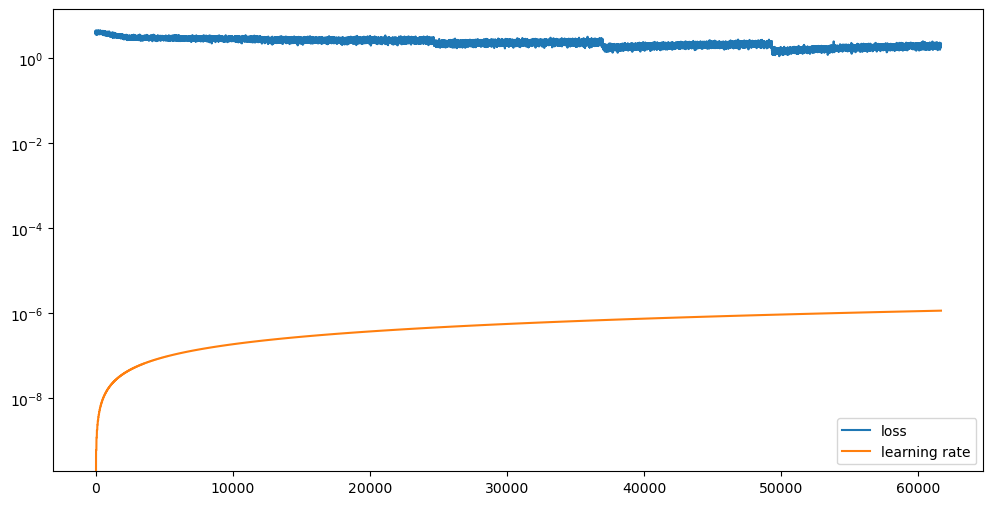

In [9]:
import numpy as np
import matplotlib.pyplot as plt

losses_np = np.array(losses)
lrs_np = np.array(lrs)

plt.figure(figsize=(12,6))
plt.plot(losses_np, label='loss')
plt.plot(lrs_np, label='learning rate')
plt.yscale('log')
plt.legend()
plt.show()

#### Inferência

Vamos ver como o modelo faz piadas.

In [ ]:
sentence_joke = "JOKE:"
input_tokens_joke = tokenizer(sentence_joke, return_tensors="pt").to(device)
output_tokens_joke = model.generate(**input_tokens_joke)
decoded_output_joke = tokenizer.decode(output_tokens_joke[0], skip_special_tokens=True)

print(f"decoded joke: \n{decoded_output_joke}")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/home/wallabot/miniconda3/envs/nlp/lib/python3.11/site-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


decoded joke: 
JOKE:!!!!!!!!!!!!!!!!!


Você pode ver que você passa uma sequência com a palavra `joke` e ele retorna uma piada. Mas se você retornar outra string, ele não retornará

In [ ]:
sentence_joke = "My dog is cute and"
input_tokens_joke = tokenizer(sentence_joke, return_tensors="pt").to(device)
output_tokens_joke = model.generate(**input_tokens_joke)
decoded_output_joke = tokenizer.decode(output_tokens_joke[0], skip_special_tokens=True)

print(f"decoded joke: \n{decoded_output_joke}")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


decoded joke: 
My dog is cute and!!!!!!!!!!!!!!!


### Ajuste fino do GPT-2 para classificação de sentenças

Agora vamos fazer um treinamento com as bibliotecas Hugging Face.

#### Conjunto de dados

Usaremos o conjunto de dados `imdb` para classificar as frases em positivas e negativas.

In [1]:
from datasets import load_dataset

dataset = load_dataset("imdb")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

Vamos dar uma olhada nisso

In [2]:
dataset["train"].info

DatasetInfo(description='', citation='', homepage='', license='', features={'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['neg', 'pos'], id=None)}, post_processed=None, supervised_keys=None, task_templates=None, builder_name='parquet', dataset_name='imdb', config_name='plain_text', version=0.0.0, splits={'train': SplitInfo(name='train', num_bytes=33435948, num_examples=25000, shard_lengths=None, dataset_name='imdb'), 'test': SplitInfo(name='test', num_bytes=32653810, num_examples=25000, shard_lengths=None, dataset_name='imdb'), 'unsupervised': SplitInfo(name='unsupervised', num_bytes=67113044, num_examples=50000, shard_lengths=None, dataset_name='imdb')}, download_checksums={'hf://datasets/imdb@e6281661ce1c48d982bc483cf8a173c1bbeb5d31/plain_text/train-00000-of-00001.parquet': {'num_bytes': 20979968, 'checksum': None}, 'hf://datasets/imdb@e6281661ce1c48d982bc483cf8a173c1bbeb5d31/plain_text/test-00000-of-00001.parquet': {'num_bytes': 20470363, 'checksum': None}, 'hf:

Vamos dar uma olhada nos recursos desse conjunto de dados.

In [3]:
dataset["train"].info.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

O conjunto de dados contém strings e classes. Além disso, há dois tipos de classes, `pos` e `neg`. Vamos criar uma variável com o número de classes

In [4]:
num_clases = len(dataset["train"].unique("label"))
num_clases

2

#### Tokeniser

Criamos o tokenizador

In [5]:
from transformers import GPT2Tokenizer

checkpoints = "openai-community/gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(checkpoints, bos_token='<|startoftext|>', eos_token='<|endoftext|>', pad_token='<|pad|>')
tokenizer.pad_token = tokenizer.eos_token

Agora que temos um tokenizador, podemos tokenizar o conjunto de dados, pois o modelo só entende tokens.

In [6]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

#### Modelo

Instanciamos o modelo

In [7]:
from transformers import GPT2ForSequenceClassification

model = GPT2ForSequenceClassification.from_pretrained(checkpoints, num_labels=num_clases).half()
model.config.pad_token_id = model.config.eos_token_id

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at openai-community/gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Avaliação

Criamos uma métrica de avaliação

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

#### Trainer

Criamos o instrutor

In [8]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
)

#### Treinamento

Treinamos

In [25]:
trainer.train()

Step,Training Loss
500,0.379400
1000,0.000000
1500,0.000000
2000,0.000000
2500,0.000000
3000,0.000000
3500,0.000000
4000,0.000000
4500,0.000000


TrainOutput(global_step=4689, training_loss=0.04045845954294626, metrics={'train_runtime': 5271.3532, 'train_samples_per_second': 14.228, 'train_steps_per_second': 0.89, 'total_flos': 3.91945125888e+16, 'train_loss': 0.04045845954294626, 'epoch': 3.0})

#### Inferência

Testamos o modelo após o treinamento

In [19]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def get_sentiment(sentence):
    inputs = tokenizer(sentence, return_tensors="pt").to(device)
    outputs = model(**inputs)
    prediction = outputs.logits.argmax(-1).item()
    return "positive" if prediction == 1 else "negative"

In [20]:
sentence = "I hate this movie!"
print(get_sentiment(sentence))

negative
